# Prepare Data for Alouette Microapplication

#### Updated: Mar 22, 2023

#  

Shape processed image results data to fit current Alouette microapplication (https://donnees-data.asc-csa.gc.ca:8888/alouette/):

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import random
from random import randrange

In [2]:
dataDir = 'C:/Users/rnaidoo/Documents/Projects_data/Alouette_I/'

#  

#### Functions:

In [3]:
def fix_Lat(x):
    
    if type(x) == str:
        if 'S' in x:
            x = x.replace('S', '')
            x = float(x)
            x = -1*x
        elif 'N' in x:
            x = x.replace('N', '')

    return x

In [4]:
def fix_Lng(x):
    
    if type(x) == str:
        if 'W' in x:
            x = x.replace('W', '')
            x = float(x)
            x = -1*x
        elif 'E' in x:
            x = x.replace('E', '')

    return x

#  

#### Shape post-processed image results to fit current Alouette microapplication data model:

Load current microapplication data:

In [5]:
df_current = pd.read_csv(dataDir + 'microapplication_total_data_retr20230113.csv')
print(len(df_current))
df_current.head()

406566


,ID,File name,Minimum frequency,Maximum depth,Subdirectory name,Satellite number,Ground station number,Timestamp,Ground station name,Ground station code,Latitude,Longitude
0,0,R014207938/907-A/1,1.709677,974.545455,907-A,1,1,1965-05-25 16:48:01,"Resolute Bay, No. W. Territories",RES,74.7,-95.0
1,1,R014207938/907-A/10,1.645161,1032.727273,907-A,1,1,1965-05-25 16:50:58,"Resolute Bay, No. W. Territories",RES,74.7,-95.0
2,2,R014207938/907-A/100,1.701613,989.090909,907-A,1,1,1965-05-26 08:34:21,"Resolute Bay, No. W. Territories",RES,74.7,-95.0
3,3,R014207938/907-A/101,1.685484,1080.000000,907-A,1,1,1965-05-26 08:34:38,"Resolute Bay, No. W. Territories",RES,74.7,-95.0
4,4,R014207938/907-A/102,1.681452,203.636364,907-A,1,1,1965-05-26 08:34:58,"Resolute Bay, No. W. Territories",RES,74.7,-95.0


Load current post-processed results to test:

In [6]:
#Load BATCH_I_Run1 results
df_result = pd.read_csv(dataDir + 'result_total_v20230305.csv')

c:\DevSoftware\Anaconda38\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (24,25,26,27,29,31,33,34,35,36) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Characterize:

In [7]:
print(len(df_result))
df_result.head()

812606


,Roll,Subdirectory,filename,processed_image_class,fmin,max_depth,year,day,hour,minute,...,limits,day_of_year,month_day,month,Timestamp,Station_Number,Station_Code,Station_Name,Lat,Lng
0,R014207948,1689-9B,100.png,num,6.634921,1409.433962,1962.0,1.0,0.0,0.0,...,NaN,1.0,01-01,1.0,1962-01-01 00:00:01,NaN,NaN,NaN,NaN,NaN
1,R014207943,2097-5B,208.png,num,1.592742,1198.148148,1962.0,1.0,0.0,0.0,...,NaN,1.0,01-01,1.0,1962-01-01 00:00:01,NaN,NaN,NaN,NaN,NaN
2,R014207943,2097-5B,207.png,num,1.592742,1287.037037,1962.0,1.0,0.0,0.0,...,NaN,1.0,01-01,1.0,1962-01-01 00:00:02,NaN,NaN,NaN,NaN,NaN
3,R014207948,1692-9B,82.png,num,1.500000,1462.745098,1962.0,1.0,0.0,0.0,...,NaN,1.0,01-01,1.0,1962-01-01 00:00:10,NaN,NaN,NaN,NaN,NaN
4,R014207907F,506,Image0063.png,num,2.609091,1415.909091,1962.0,1.0,0.0,0.0,...,NaN,1.0,01-01,1.0,1962-01-01 00:00:10,NaN,NaN,NaN,NaN,NaN


In [8]:
df_result.columns

Index(['Roll', 'Subdirectory', 'filename', 'processed_image_class', 'fmin',
       'max_depth', 'year', 'day', 'hour', 'minute', 'second',
       'station_number', 'satellite_number', 'day_1', 'day_2', 'day_3',
       'hour_1', 'hour_2', 'minute_1', 'minute_2', 'second_1', 'second_2',
       'station_number_1', 'station_number_2', 'metadata_type', 'is_dot',
       'func_name', 'limits', 'day_of_year', 'month_day', 'month', 'Timestamp',
       'Station_Number', 'Station_Code', 'Station_Name', 'Lat', 'Lng'],
      dtype='object')

<AxesSubplot:xlabel='year', ylabel='Count'>

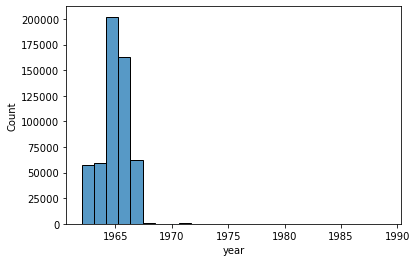

In [9]:
sns.histplot(data=df_result, x='year', bins=25)

(0.0, 31.0)

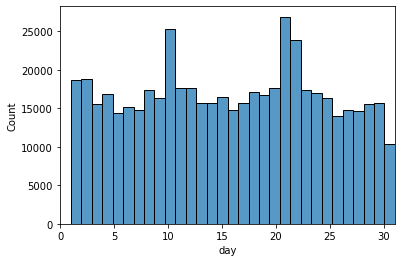

In [10]:
sns.histplot(data=df_result, x='day', bins=31)
plt.xlim(0, 31)

(0.0, 24.0)

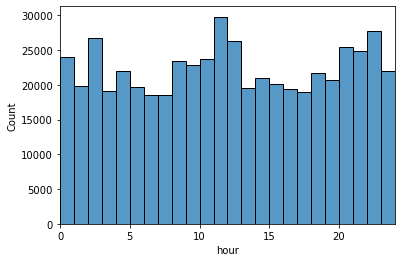

In [11]:
sns.histplot(data=df_result, x='hour', bins=24)
plt.xlim(0, 24)

(0.0, 60.0)

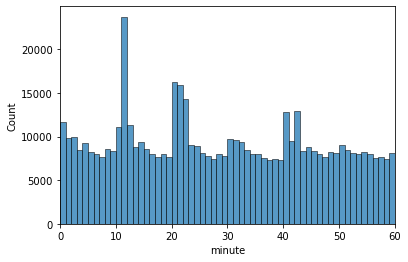

In [12]:
sns.histplot(data=df_result, x='minute', bins=60)
plt.xlim(0, 60)

(0.0, 60.0)

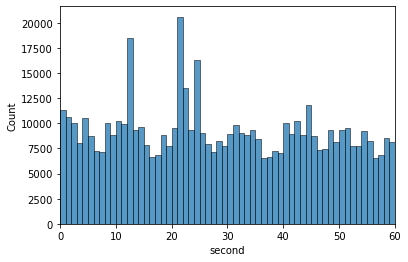

In [13]:
sns.histplot(data=df_result, x='second', bins=60)
plt.xlim(0, 60)

Shape results to fit microapplication data model:

In [14]:
df_result['ID'] = df_result.index
df_result['File name'] = df_result['Directory'].astype(str) + '/' + df_result['Subdirectory'].astype(str) + '/' + df_result['filename'].str.replace('.png', '')
df_result['Minimum frequency'] = df_result['fmin']
df_result['Maximum depth'] = df_result['max_depth']
df_result['Subdirectory name'] = df_result['Subdirectory']
df_result['Satellite number'] = df_result['satellite_number']
df_result['Ground station number'] = df_result['station_number']
df_result['Ground station name'] = df_result['Station_Name']
df_result['Ground station code'] = df_result['Station_Code']
df_result['Latitude'] = df_result['Lat']
df_result['Longitude'] = df_result['Lng']

<ipython-input-14-6ba5e97762fd>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_result['File name'] = df_result['Roll'].astype(str) + '/' + df_result['Subdirectory'].astype(str) + '/' + df_result['filename'].str.replace('.png', '')


In [15]:
print(len(df_result))
df_result.head()

812606


,Roll,Subdirectory,filename,processed_image_class,fmin,max_depth,year,day,hour,minute,...,File name,Minimum frequency,Maximum depth,Subdirectory name,Satellite number,Ground station number,Ground station name,Ground station code,Latitude,Longitude
0,R014207948,1689-9B,100.png,num,6.634921,1409.433962,1962.0,1.0,0.0,0.0,...,R014207948/1689-9B/100,6.634921,1409.433962,1689-9B,1.0,1.0,NaN,NaN,NaN,NaN
1,R014207943,2097-5B,208.png,num,1.592742,1198.148148,1962.0,1.0,0.0,0.0,...,R014207943/2097-5B/208,1.592742,1198.148148,2097-5B,1.0,1.0,NaN,NaN,NaN,NaN
2,R014207943,2097-5B,207.png,num,1.592742,1287.037037,1962.0,1.0,0.0,0.0,...,R014207943/2097-5B/207,1.592742,1287.037037,2097-5B,1.0,1.0,NaN,NaN,NaN,NaN
3,R014207948,1692-9B,82.png,num,1.500000,1462.745098,1962.0,1.0,0.0,0.0,...,R014207948/1692-9B/82,1.500000,1462.745098,1692-9B,1.0,1.0,NaN,NaN,NaN,NaN
4,R014207907F,506,Image0063.png,num,2.609091,1415.909091,1962.0,1.0,0.0,0.0,...,R014207907F/506/Image0063,2.609091,1415.909091,506,0.0,11.0,NaN,NaN,NaN,NaN


#  

#### Select data with Timestamp, station_number, Station_Code, Lat, Lng, fmin, max_depth

In [16]:
df_result2 = df_result[~pd.isna(df_result['Timestamp'])]
df_result2 = df_result2[~pd.isna(df_result2['station_number'])]
df_result2 = df_result2[~pd.isna(df_result2['Station_Code'])]
df_result2 = df_result2[~pd.isna(df_result2['Lat'])]
df_result2 = df_result2[~pd.isna(df_result2['Lng'])]
df_result2 = df_result2[~pd.isna(df_result2['fmin'])]
df_result2 = df_result2[~pd.isna(df_result2['max_depth'])]
print(len(df_result2))

492183


Out of 886,320 images in BATCH I, <b>492,183 images</b> have all features read (i.e: fit for the microapplication). <b>~ 55.5%</b>

#  

#### Adjust Lat, Lng:

In [17]:
df_result2['Latitude'] = df_result2['Latitude'].fillna('')

In [18]:
df_result2['Latitude'] = df_result2['Latitude'].apply(lambda x: fix_Lat(x))

In [19]:
df_result2['Longitude'] = df_result2['Longitude'].fillna('')

In [20]:
df_result2['Longitude'] = df_result2['Longitude'].apply(lambda x: fix_Lng(x))

#  

#### Compare random sample of results with current microapplication data:

In [21]:
df_sample = df_result2.sample(10)
df_sample = df_sample.add_suffix('_sample')
df_sample

,Roll_sample,Subdirectory_sample,filename_sample,processed_image_class_sample,fmin_sample,max_depth_sample,year_sample,day_sample,hour_sample,minute_sample,...,File name_sample,Minimum frequency_sample,Maximum depth_sample,Subdirectory name_sample,Satellite number_sample,Ground station number_sample,Ground station name_sample,Ground station code_sample,Latitude_sample,Longitude_sample
180452,R014207980,999-A,320.png,num,1.729839,1002.000000,1965.0,4.0,13.0,17.0,...,R014207980/999-A/320,1.729839,1002.000000,999-A,1.0,5.0,"Quito, Ecuador",QUI,-0.6,-78.6
402771,R014207956,2381-7A,302.png,num,1.725806,970.588235,1966.0,20.0,12.0,1.0,...,R014207956/2381-7A/302,1.725806,970.588235,2381-7A,1.0,7.0,"Quito, Ecuador",QUI,-0.6,-78.6
399600,R014207943,2080-1A,155.png,num,1.802419,1364.814815,1966.0,14.0,1.0,47.0,...,R014207943/2080-1A/155,1.802419,1364.814815,2080-1A,1.0,1.0,"Blossom Point, MD, USA",BPT,38.4,-77.1
372835,R014207942,1950-5A,58.png,num,1.657258,1230.188679,1966.0,30.0,14.0,24.0,...,R014207942/1950-5A/58,1.657258,1230.188679,1950-5A,1.0,5.0,"Quito, Ecuador",QUI,-0.6,-78.6
129835,R014207966,1154-B,214.png,num,1.693548,578.431373,1965.0,22.0,5.0,24.0,...,R014207966/1154-B/214,1.693548,578.431373,1154-B,1.0,6.0,"Fort Myers, FL, USA",FTM,26.6,-81.9
461662,R014207959,2344-1B,140.png,num,1.794355,1285.714286,1967.0,13.0,6.0,2.0,...,R014207959/2344-1B/140,1.794355,1285.714286,2344-1B,1.0,1.0,"Blossom Point, MD, USA",BPT,38.4,-77.1
270892,R014207968,1232-9B,128.png,num,1.560484,1254.716981,1965.0,14.0,3.0,36.0,...,R014207968/1232-9B/128,1.560484,1254.716981,1232-9B,1.0,9.0,Falkland Islands (Islas Malvinas),SOL,-51.8,-57.9
146130,R014207974,765-A,248.png,num,1.701613,1087.500000,1965.0,25.0,9.0,48.0,...,R014207974/765-A/248,1.701613,1087.500000,765-A,1.0,9.0,Falkland Islands (Islas Malvinas),SOL,-51.8,-57.9
72816,R014207929F,454,Image0033.png,num,1.536290,929.545455,1964.0,18.0,1.0,58.0,...,R014207929F/454/Image0033,1.536290,929.545455,454,1.0,5.0,"College, Fairbanks, AK, USA",COL,64.9,-147.8
47420,R014207823,3601-50A,245.png,num,5.696262,1277.777778,1964.0,10.0,22.0,42.0,...,R014207823/3601-50A/245,5.696262,1277.777778,3601-50A,2.0,3.0,"Ottawa, Canada",OTT,45.4,-75.7


In [22]:
df_merge = df_sample.merge(df_current, left_on='File name_sample', right_on='File name')
df_merge

,Roll_sample,Subdirectory_sample,filename_sample,processed_image_class_sample,fmin_sample,max_depth_sample,year_sample,day_sample,hour_sample,minute_sample,...,Minimum frequency,Maximum depth,Subdirectory name,Satellite number,Ground station number,Timestamp,Ground station name,Ground station code,Latitude,Longitude
0,R014207980,999-A,320.png,num,1.729839,1002.000000,1965.0,4.0,13.0,17.0,...,1.729839,1002.000000,999-A,1,5,1965-07-04 13:17:56,"Quito, Ecuador",QUI,-0.6,-78.6
1,R014207956,2381-7A,302.png,num,1.725806,970.588235,1966.0,20.0,12.0,1.0,...,1.725806,970.588235,2381-7A,1,7,1966-10-20 12:01:13,"Quito, Ecuador",QUI,-0.6,-78.6
2,R014207943,2080-1A,155.png,num,1.802419,1364.814815,1966.0,14.0,1.0,47.0,...,1.802419,1364.814815,2080-1A,1,1,1966-10-14 01:47:21,"Blossom Point, Maryland",BPT,38.4,-77.1
3,R014207942,1950-5A,58.png,num,1.657258,1230.188679,1966.0,30.0,14.0,24.0,...,1.657258,1230.188679,1950-5A,1,5,1966-07-30 14:24:23,"Quito, Ecuador",QUI,-0.6,-78.6
4,R014207966,1154-B,214.png,num,1.693548,578.431373,1965.0,22.0,5.0,24.0,...,1.693548,578.431373,1154-B,1,6,1965-03-22 05:24:45,"Fort Myers, Florida",FTM,26.6,-81.9
5,R014207959,2344-1B,140.png,num,1.794355,1285.714286,1967.0,13.0,6.0,2.0,...,1.794355,1285.714286,2344-1B,1,1,1967-03-13 06:02:13,"Blossom Point, Maryland",BPT,38.4,-77.1
6,R014207968,1232-9B,128.png,num,1.560484,1254.716981,1965.0,14.0,3.0,36.0,...,1.560484,1254.716981,1232-9B,1,9,1965-12-14 03:36:38,"South Atlantic, Falkland Islands",SOL,-51.8,-57.9
7,R014207974,765-A,248.png,num,1.701613,1087.500000,1965.0,25.0,9.0,48.0,...,1.701613,1087.500000,765-A,1,9,1965-04-25 09:48:17,"South Atlantic, Falkland Islands",SOL,-51.8,-57.9


In [23]:
print('sample ----- current')
print('')
for col in list(df_current.columns):
    print(col + ':')
    print('------------')
    for i in range(0, len(df_merge)):
        print(str(df_merge[col + '_sample'].iloc[i]) + ' ----- ' + str(df_merge[col].iloc[i]))
    print('------------')
    print('')
    print('')

sample ----- current

ID:
------------
180452 ----- 55455
402771 ----- 64242
399600 ----- 59785
372835 ----- 33995
129835 ----- 76034
461662 ----- 33072
270892 ----- 27071
146130 ----- 9085
------------


File name:
------------
R014207980/999-A/320 ----- R014207980/999-A/320
R014207956/2381-7A/302 ----- R014207956/2381-7A/302
R014207943/2080-1A/155 ----- R014207943/2080-1A/155
R014207942/1950-5A/58 ----- R014207942/1950-5A/58
R014207966/1154-B/214 ----- R014207966/1154-B/214
R014207959/2344-1B/140 ----- R014207959/2344-1B/140
R014207968/1232-9B/128 ----- R014207968/1232-9B/128
R014207974/765-A/248 ----- R014207974/765-A/248
------------


Minimum frequency:
------------
1.7298387096774193 ----- 1.7298387096774193
1.7258064516129032 ----- 1.7258064516129032
1.8024193548387093 ----- 1.8024193548387093
1.657258064516129 ----- 1.6572580645161292
1.6935483870967742 ----- 1.6935483870967742
1.7943548387096775 ----- 1.7943548387096775
1.560483870967742 ----- 1.560483870967742
1.7016129032258

#  

#### Save:

In [24]:
df_result2.to_csv(dataDir + 'result_BATCH_I_microapp_v20230305.csv', index=False)